In [20]:
import json
import statistics

# Define the path to the JSON file
file_path = "../artist_data.json"

# Open the JSON file and load the data
with open(file_path, 'r') as f:
    data = json.load(f)

# Debugging: Print the type and first few elements of the data
print(f"Type of data: {type(data)}")
print(f"First element: {data[0] if len(data) > 0 else 'No data'}")

# Parse each observation and extract the spotify.monthlyListeners values
monthly_listeners = []
for obs in data:
    try:
        obs_dict = json.loads(obs)  # Parse the JSON string into a dictionary
        if 'spotify' in obs_dict:
            # print(f"Spotify data found: {obs_dict['spotify']}")  # Debugging: Print spotify data
            if 'monthlyListeners' in obs_dict['spotify']:
                monthly_listeners.append(obs_dict['spotify']['monthlyListeners'])
                # print(f"Monthly listeners: {obs_dict['spotify']['monthlyListeners']}")  # Debugging: Print monthly listeners
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")
    except KeyError as e:
        print(f"Key error: {e}")

# Check if monthly_listeners is empty
if not monthly_listeners:
    print("No spotify.monthlyListeners values found.")
else:
    # Calculate statistics
    min_listeners = min(monthly_listeners)
    max_listeners = max(monthly_listeners)
    median_listeners = statistics.median(monthly_listeners)
    mean_listeners = statistics.mean(monthly_listeners)
    std_dev_listeners = statistics.stdev(monthly_listeners)

    # Print the results
    print(f"Number of rows in the result: {len(data)}")
    print(f"Min monthly listeners: {min_listeners}")
    print(f"Max monthly listeners: {max_listeners}")
    print(f"Median monthly listeners: {median_listeners}")
    print(f"Mean monthly listeners: {mean_listeners}")
    print(f"Standard deviation of monthly listeners: {std_dev_listeners}")

Type of data: <class 'list'>
First element: {"deezer": {"url": "https://deezer.com/artist/3922661", "default": true, "identifier": "3922661", "platformName": "Deezer"}, "tiktok": {"url": "https://tiktok.com/@mora", "likes": {"ages": [], "cities": [], "genders": [], "countries": [], "languages": [], "ethnicities": [], "gendersPerAge": []}, "stats": {"postCount": 3, "viewCount": 1600000, "followerCount": 561700, "engagementRate": 0.347071, "engagementCount": 194950, "averageReelsPlays": 0, "averageLikesPerPost": 194950, "averageViewsPerPost": 1600000, "averageCommentsPerPost": 1418}, "default": true, "follows": {"ages": [{"code": "13-17", "weight": 0.139066}, {"code": "18-24", "weight": 0.682063}, {"code": "25-34", "weight": 0.156118}, {"code": "35-44", "weight": 0.018241}, {"code": "45-64", "weight": 0.004511}, {"code": "65-", "weight": 0}], "cities": [], "genders": [{"code": "MALE", "weight": 0.523113}, {"code": "FEMALE", "weight": 0.476887}], "countries": [{"weight": 0.195112, "countr

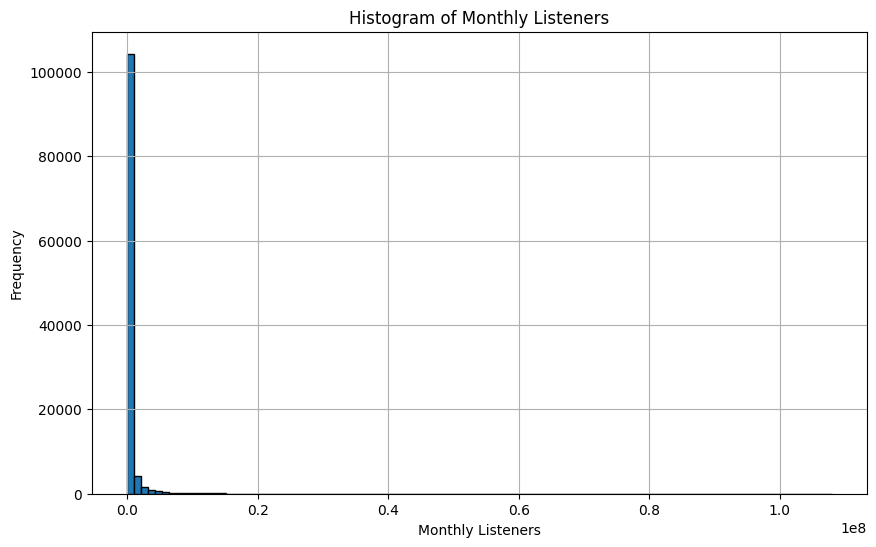

In [23]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Check if monthly_listeners is empty
if not monthly_listeners:
    print("No spotify.monthlyListeners values found.")
else:
    # Plot the histogram with more bins
    plt.figure(figsize=(10, 6))
    plt.hist(monthly_listeners, bins=100, edgecolor='black')
    plt.title('Histogram of Monthly Listeners')
    plt.xlabel('Monthly Listeners')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()